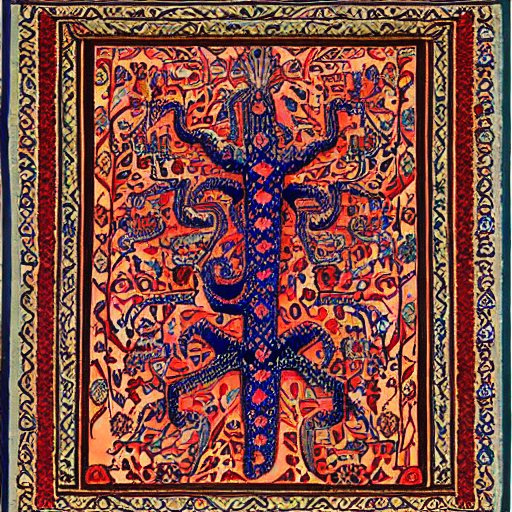

[A Neural Probabilistic language model](A_Neural_Probabilistic_Language_Model.pdf)

In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

words = open('names.txt', 'r').read().splitlines()
chars = sorted(set("".join(words)))
stoi = {chars[i]:i+1 for i in range(len(chars))}
stoi['.'] = 0
itos = {i:c for c,i in stoi.items()}
print(f'{words[:8]=}\n{itos=}\n{stoi=}')


words[:8]=['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']
itos={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
stoi={'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [179]:
block_size = 3 # context length
X, Y = [], []

i = 0
for w in words:
    print(w)
    context = [0] * block_size
    for c in w + '.':
        ix = stoi[c]
        X.append(context)
        Y.append(ix)
        i += 1
        #if i < 32:
        # print (f'{i:02d}  ',"".join([itos[x] for x in context]), '--->', itos[ix])
        context = context[1:] + [ix] # crop 1 and append
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

kataleia
katharina
kathia
kayan
kayslee
keala
keelie
keiko
kelci
kennia
kenzly
ketzaly
khalaya
kior
kopelyn
kourtlynn
kova
kristel
labella
lamyah
larae
lasya
latoya
layonna
leannah
leda
levy
lexani
lilja
lolita
lonnie
lorielle
lunah
lyndie
maayan
mackenzy
maddyson
maeven
maezie
maimouna
mairin
maiyah
maize
makenlee
makennah
mala
malaia
malaina
malasia
malayiah
maleya
mariamawit
marylin
mayari
maybel
mayven
mccall
mckenley
mckenzy
mckynzie
melea
mercedez
meridian
micayla
mihika
milaya
mily
morghan
morireoluwa
mulani
naeema
nahara
naidelyn
najwa
nani
nataley
natalina
natilee
nayara
neah
neilani
neysa
niana
niaomi
normani
oliana
oriyah
oshun
phyllis
rakeb
ramiah
reigan
reighlyn
renad
rene
rhylynn
rida
roan
roizy
ronin
rosamund
rossy
rubee
ryelle
sabiha
sadee
sakari
samariah
sammy
sarabi
sayde
sayra
shadia
shane
shanzay
shariyah
shawn
shelbi
shelbie
shevy
shoshanna
shraddha
shravya
siddhi
solveig
suraya
syrena
taiya
talula
tamsin
tiare
tilda
turner
vaanya
valorie
varsha
vung
waverley
waylo

galaxie
galylea
geles
genessy
genoveva
genovia
gentree
ghita
gianah
giani
gianina
giannie
gilana
gilly
gissela
gizella
glori
glorious
goldi
graceland
graham
graycelynn
greeicy
greidy
gretl
griselle
gryffin
gursirat
gwenda
gynesis
hadar
haddi
hadicha
hadyn
haeven
hafiza
hagar
hajer
halani
hamda
hamida
hamna
hanako
hannahrose
hannie
hanny
hanvi
harly
harmonei
harpergrace
harshini
haseya
hau
hawley
hawo
haysley
hayzleigh
hazal
haze
heera
heilyn
heloise
hendy
herlinda
hermela
hermosa
hilde
hiliana
hodan
holliday
hollin
hoor
hortencia
hosna
hrisha
huma
humayra
humna
hynlee
hypatia
ian
ibtihaj
idali
idalina
iesha
ifeoma
ifra
ifunanya
ifza
ihana
ikora
ileen
ilithyia
illeana
imaya
imery
imina
inayat
inci
indiah
irais
irisa
iryna
isana
italie
ivalee
ivani
ivvy
iwinosa
izna
izumi
jacobi
jacquelyne
jadeyn
jadoir
jaeliana
jaella
jahniyah
jaiani
jaidalyn
jaidence
jailei
jailine
jaira
jakalyn
jakayln
jakelyn
jakylah
jalaila
jalana
jalee
jalei
jalonni
jalyla
jalyric
jamella
jamera
jamese
jamilia
jami

tavaris
toma
tommaso
torrian
tyrek
urias
vittorio
wake
witt
xaviar
yacoub
yafet
yamen
yoandri
yohannes
yona
youssouf
yusif
yuven
zalman
zed
zekiah
zlatan
abdulhadi
achilleus
adir
adrain
aidon
aldin
aldon
aleem
aloysius
amun
anias
antuan
anubis
aous
aria
auguste
avari
averi
avry
azad
barack
baylin
baylon
benjamyn
benjiman
berkeley
berl
bob
branton
braun
brion
brodrick
burhan
celso
chipper
coltan
colvin
constantino
corbett
cris
daer
dalen
danell
dashon
davonta
dawit
dawsen
daxtin
deakon
decklin
demauri
demetrios
dheeran
dinero
diondre
divit
donell
dylen
edrik
elim
eliya
eoghan
everitt
frederik
friedrich
ganon
gates
given
greycen
greysyn
hridhaan
iann
ilay
imron
ithan
izen
jaece
jaevion
jager
jaheem
jaion
jamario
jasean
jasim
jayko
jaylynn
jazper
jeevan
jentry
jorel
josaiah
josemiguel
jostin
journee
joyner
judas
kaileb
kashdon
kayzen
kazi
kejuan
kendale
kevyn
kieren
kinan
koehn
kolston
koltin
kove
kyrian
kyus
lando
laramie
larsen
lauro
layten
leonides
liem
lorcan
louden
maasai
macarthur
m

rally
ramar
ranvir
rawad
rawlin
rawling
raxton
rayleigh
raymier
raynav
rehansh
rehoboth
reik
renard
renardo
rett
reydan
reyn
reyner
rezwan
rhyis
rhyon
rhyse
rhyson
richland
richy
ridger
rin
rishit
rishith
rishon
riyon
rjay
rmon
roam
roanin
roary
robben
rocklan
rodderick
rohail
rohi
rohith
roko
roldan
rolin
roma
romanus
romelle
romere
romie
romil
romney
romy
ronon
rontrell
rooke
rorey
rosbel
rosen
roshane
royden
rron
rueger
ryad
ryansh
rydell
ryell
ryer
ryerson
rylei
ryus
saafir
saahas
saajan
saam
saavan
sadi
sador
safan
sahej
saier
saivion
salesi
samaksh
saman
samba
samiul
samrudh
samvel
samyak
samyog
sang
sanji
sankalp
sarfaraz
sarhan
sasuke
satori
saunders
savannah
saviel
savino
savio
sayeed
sayge
sayveon
schyler
scooter
scot
sebastiann
selik
sellers
sem
semere
seojun
serhan
seti
severide
severo
sevrin
shabazz
shafay
shahbaz
shahzaib
shalin
shameek
shamere
shamshon
shanav
shanmukh
sharaf
shavar
shayde
shelden
shemuel
sher
sherrod
shiah
shin
shiro
shishir
shmaya
shreyash
sidhan
sier
s

In [201]:
def build_dataset(words):
    block_size = 3 # context length
    X, Y = [], []

    i = 0
    for w in words:
        context = [0] * block_size
        for c in w + '.':
            ix = stoi[c]
            X.append(context)
            Y.append(ix)
            i += 1
            #if i < 32:
            # print (f'{i:02d}  ',"".join([itos[x] for x in context]), '--->', itos[ix])
            context = context[1:] + [ix] # crop 1 and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

len(Xtr), len(Xdev), len(Xte)

torch.Size([182484, 3]) torch.Size([182484])
torch.Size([22869, 3]) torch.Size([22869])
torch.Size([22793, 3]) torch.Size([22793])


(182484, 22869, 22793)

(182424, 22836, 22886)

In [28]:
X.shape, Y.shape, X[0], X[0].dtype

(torch.Size([32, 3]), torch.Size([32]), tensor([0, 0, 0]), torch.int64)

In [40]:
C = torch.randn(27,2)
C[5]

tensor([-0.8365, -1.1745])

In [41]:
# we don't need to use one hot encoding
F.one_hot(torch.tensor(5), num_classes=27 ).float() @ C

tensor([-0.8365, -1.1745])

In [44]:
# how to get multiple indices at one. here we're indexing with a list to get rows 5,6,7 and 7
C[[5,6,7,7]]

tensor([[-0.8365, -1.1745],
        [ 0.6211, -1.1838],
        [ 1.4702, -0.3567],
        [ 1.4702, -0.3567]])

In [102]:
# first layer... 3 inputs (but with 2 dims) and we decideed upon 100 nurons
W1 = torch.randn((6,100))
# bias, at last
b1 = torch.randn(100)
# emb is known as the embedding (multi dim representation of our inputs)
emb = C[X]
# C are random 27x2 that correspond to our letters (instead of hot one) in 2d
# X is an input layer 32,3 tensor that are the 5 first words expressed in 3 letter blocks
print(f'{emb.shape=}, {C.shape=}, {X.shape=}')

# we thus want to multiply our inputs (embeddings) with our first layer (W1)
# but there's a dimension mismatch
# emb @ W1 + b1 ==>  RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

h = torch.tanh(emb.view(-1,6) @ W1 + b1) # emb goes from [32, 3, 2] to [32, 6] with this view
h.shape

emb.shape=torch.Size([32, 3, 2]), C.shape=torch.Size([27, 2]), X.shape=torch.Size([32, 3])


torch.Size([32, 100])

In [99]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)
logits = (h @ W2 + b2)
print(f'{logits.shape=}')
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
print(f'{probs.shape=}')

logits.shape=torch.Size([32, 27])
probs.shape=torch.Size([32, 27])


In [134]:
# sampling 
loss = -probs[torch.arange(32), Y].log().mean()
# a == b!


tensor([6.2437e-10, 1.3213e-08, 3.1127e-08, 3.3685e-04, 1.9207e-13, 1.1385e-11,
        4.2029e-08, 5.9261e-08, 1.1680e-10, 2.1108e-08, 2.1936e-10, 3.5188e-17,
        4.4431e-06, 1.3782e-07, 4.5799e-03, 4.2320e-07, 5.6069e-12, 2.2524e-07,
        5.8090e-01, 2.5031e-17, 1.5676e-11, 1.9836e-06, 6.1366e-06, 2.9309e-06,
        1.5670e-11, 8.5544e-11, 5.5164e-12, 4.1867e-07, 1.1953e-04, 1.7112e-10,
        4.6906e-09, 4.2137e-19])

In [86]:
emb.shape


torch.Size([32, 3, 2])

In [88]:
 emb.view(-1, 6).shape

torch.Size([32, 6])

In [136]:
# ==================== RESPECT ======================

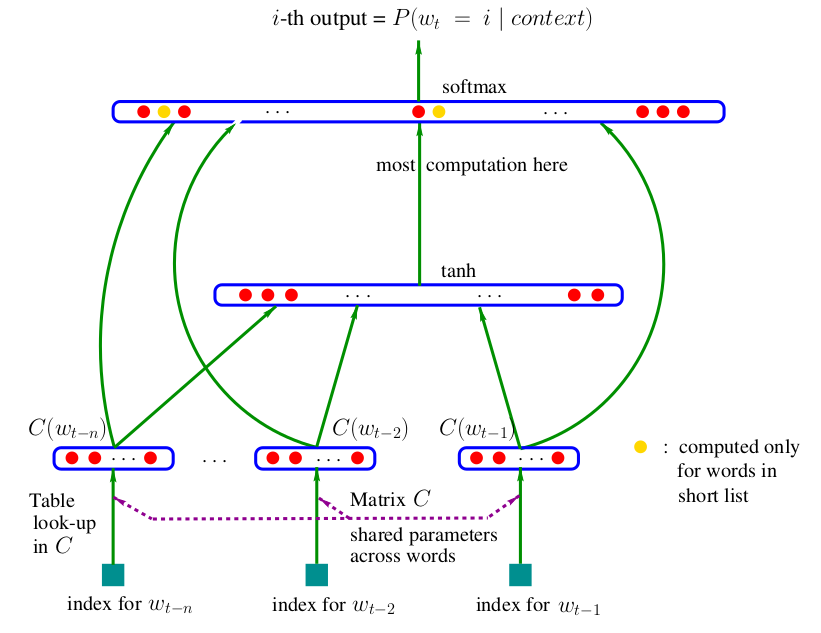

In [138]:
# dataset
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [172]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g) # our letters, in 2D
W1 = torch.randn((6, 100), generator=g) # input layer, 3 chars in 2d
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100,27), generator=g) # second layer
b2 = torch.randn((27), generator=g) # second layer bias
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [148]:
sum(p.nelement() for p in parameters)

3481

In [191]:
for i in range(1000):
    # minibatch construct (random 32 samples in the data)
    ix = torch.randint(0, X.shape[0], (32,))
    # forward
    emb = C[X[ix]] # 32, 3, 2
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32, 100
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Y[ix])
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(i, loss.item())

999 2.2968034744262695


In [178]:
logits.max(1)

torch.return_types.max(
values=tensor([13.6603, 18.4672, 20.8913, 21.0583, 17.2116, 13.6603, 16.4429, 14.5705,
        16.3037, 18.9258, 16.4625, 21.4203, 13.6603, 17.6965, 17.6684, 20.6163,
        13.6603, 16.9760, 15.7373, 17.6196, 19.0083, 16.5089, 11.3560, 11.1088,
        15.8369, 13.6603, 16.6453, 17.4093, 13.0703, 16.5728, 19.6418, 16.6858],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))